
<a id='chap-tpsvmlineaires'></a>

# Final Exam - SVM

group member: Yuming Su

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
# Loading data
iris = datasets.load_iris()

X, y = iris.data[:, :2], iris.target
# We keep 50% of the data set for the evaluationX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

In [39]:
C = 1.0 # regularization parameter
#line is creating a linear SVM classifier
lin_svc = svm.LinearSVC(C=C)
lin_svc.fit(X_train, y_train)

LinearSVC()

q1

In [41]:
# Calculate the score on the test dataset
accuracy = lin_svc.score(X_test, y_test)

# Print the accuracy
print(f"Accuracy on the test dataset: {accuracy:.2f}")


Accuracy on the test dataset: 0.80


q2

Text(0.5, 1.0, 'LinearSVC')

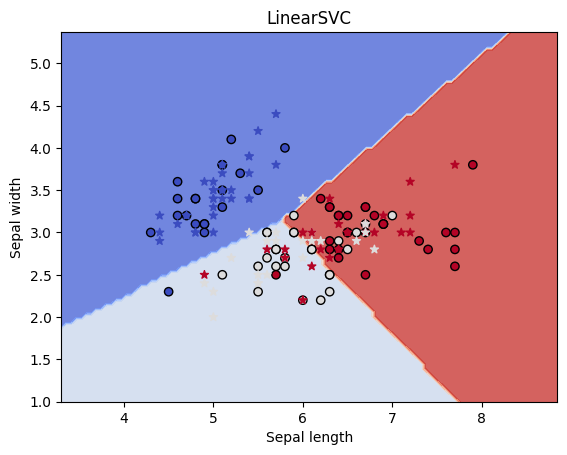

In [40]:
# Create the discretized decision surface
#Determine the minimum and maximum values for the x and y axes based on the feature values in the dataset.
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# To display the decision surface we will discretize the space with a step h
h = max((x_max - x_min) / 100, (y_max - y_min) / 100)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Decision surface(Boundary)
#Use the trained linear SVM model (lin_svc) to predict the class labels for each point in the meshgrid.
#The contourf function uses Z to determine the color levels for filling the contours.
Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#creates a filled contour plot where the color of each filled region corresponds to the predicted class label by the SVM model for the points in the specified meshgrid.
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Also show learning points
plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("LinearSVC")

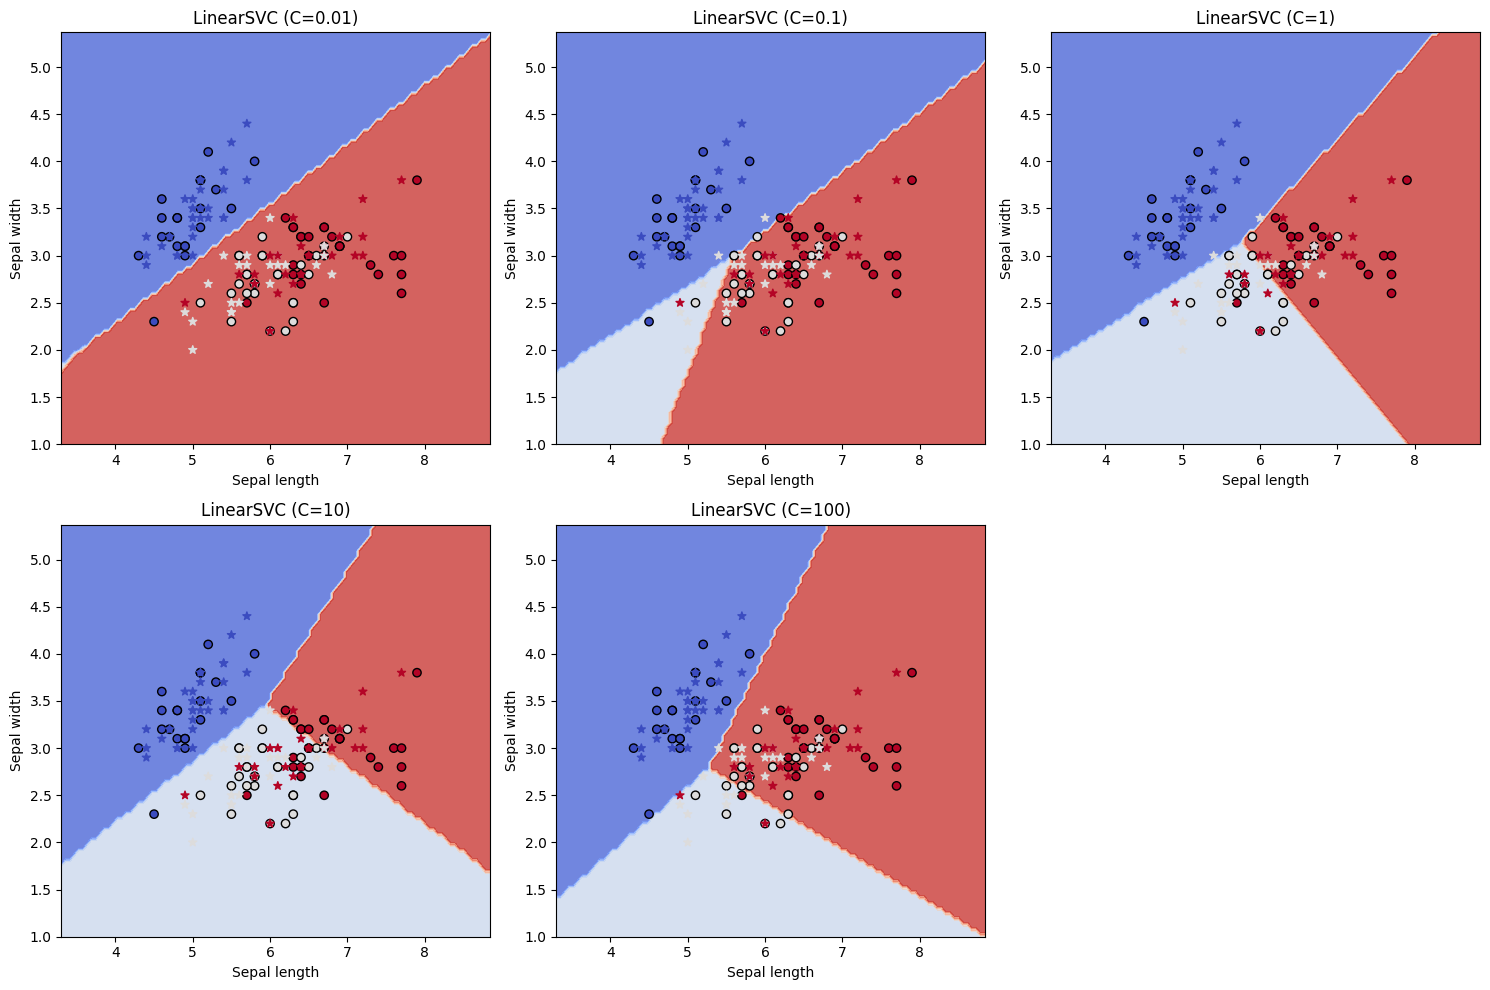

In [42]:
# Test different values for the parameter C
C_values = [0.01, 0.1, 1, 10, 100]

# Plot decision boundaries for each value of C
plt.figure(figsize=(15, 10))

for i, C in enumerate(C_values, 1):
    # Create a linear SVM classifier with the current value of C
    lin_svc = svm.LinearSVC(C=C)

    # Train the model
    lin_svc.fit(X_train, y_train)

    # Create the discretized decision surface
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = max((x_max - x_min) / 100, (y_max - y_min) / 100)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Decision surface
    Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.subplot(2, 3, i)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Scatter plot learning points
    plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
    plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)

    # Set axis labels and title
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title(f"LinearSVC (C={C})")



# Adjust layout
plt.tight_layout()
plt.show()

q3

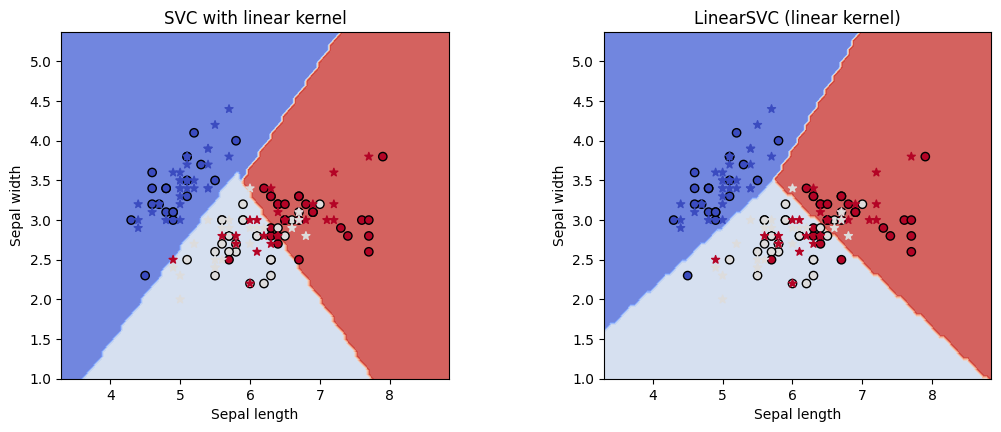

In [43]:
#start code:
lin_svc = svm.LinearSVC(C=C).fit(X_train, y_train)
svc = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)

titles = ['SVC with linear kernel', 'LinearSVC (linear kernel)']

fig = plt.figure(figsize=(12, 4.5))

for i, clf in enumerate((svc, lin_svc)):
    plt.subplot(1, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Use a color palette
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    # Also show learning points
    plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
    plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title(titles[i])
plt.show()

In [53]:
#answer:
# Loading data
iris = datasets.load_iris()
X, y = iris.data[:, :4], iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

C = 1.0

lin_svc = svm.LinearSVC(C=C)
lin_svc.fit(X_train, y_train)


svc = svm.SVC(kernel='linear', C=C)
svc.fit(X_train, y_train)

accuracy1= lin_svc.score(X_test, y_test)
print(f"(original) Accuracy on the test dataset: {accuracy1:.2f}")

accuracy2 = svc.score(X_test, y_test)
# Print the accuracy
print(f"Accuracy on the test dataset: {accuracy2:.2f}")

(original) Accuracy on the test dataset: 0.92
Accuracy on the test dataset: 0.96


q4

In [35]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target

Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        97
           1       0.88      0.90      0.89        92
           2       0.98      0.95      0.97        88
           3       0.97      0.90      0.93        97
           4       0.98      0.95      0.97       102
           5       0.92      0.96      0.94        92
           6       0.99      0.97      0.98        73
           7       0.96      0.97      0.97        80
           8       0.82      0.90      0.86        96
           9       0.90      0.87      0.88        82

    accuracy                           0.93       899
   macro avg       0.94      0.93      0.94       899
weighted avg       0.94      0.93      0.93       899



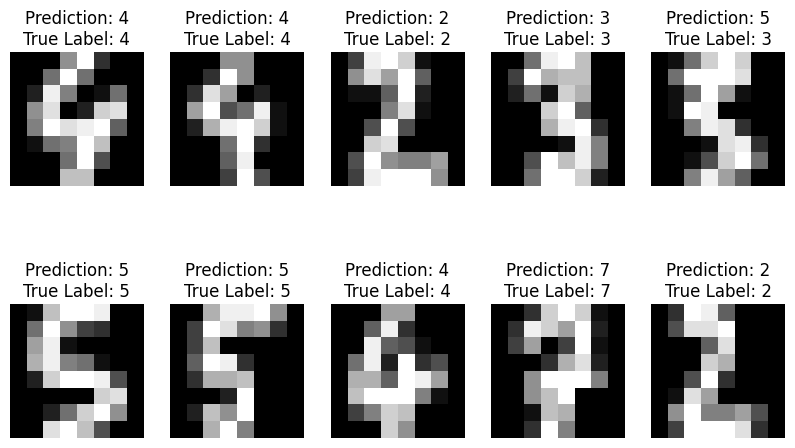

In [36]:
#answer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# Create a LinearSVC classifier
#set the C value
classifier = LinearSVC(C=100)

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)

class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
# Print the results

print("\nClassification Report:")
print(class_report)

# Visualize some predictions
fig, axes = plt.subplots(2, 5, figsize=(10, 6))
for ax, image, prediction, label in zip(axes.flatten(), X_test, y_pred, y_test):
    ax.set_title(f'Prediction: {prediction}\nTrue Label: {label}')
    ax.imshow(image.reshape(8, 8), cmap='gray')
    ax.axis('off')

plt.show()

Accuracy: 0.93


q5

In [5]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np

# Loading data
iris = datasets.load_iris()
X, y = iris.data[:, :4], iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Test different values for gamma and C
gamma_values = [0.1, 1, 10,100]
C_values = [0.01,0.1, 1, 10,100]

for gamma in gamma_values:
    for C in C_values:
        # Create and train the SVM model with RBF kernel
        svc_rbf = SVC(kernel='rbf', gamma=gamma, C=C)
        svc_rbf.fit(X_train, y_train)

        # Evaluate accuracy on the test dataset
        accuracy = svc_rbf.score(X_test, y_test)

        # Print the results
        print(f"Gamma: {gamma}, C: {C}, Accuracy: {accuracy:.2f}")



Gamma: 0.1, C: 0.01, Accuracy: 0.59
Gamma: 0.1, C: 0.1, Accuracy: 0.97
Gamma: 0.1, C: 1, Accuracy: 0.99
Gamma: 0.1, C: 10, Accuracy: 0.96
Gamma: 0.1, C: 100, Accuracy: 0.96
Gamma: 1, C: 0.01, Accuracy: 0.57
Gamma: 1, C: 0.1, Accuracy: 0.95
Gamma: 1, C: 1, Accuracy: 0.97
Gamma: 1, C: 10, Accuracy: 0.96
Gamma: 1, C: 100, Accuracy: 0.96
Gamma: 10, C: 0.01, Accuracy: 0.59
Gamma: 10, C: 0.1, Accuracy: 0.59
Gamma: 10, C: 1, Accuracy: 0.93
Gamma: 10, C: 10, Accuracy: 0.95
Gamma: 10, C: 100, Accuracy: 0.95
Gamma: 100, C: 0.01, Accuracy: 0.39
Gamma: 100, C: 0.1, Accuracy: 0.39
Gamma: 100, C: 1, Accuracy: 0.51
Gamma: 100, C: 10, Accuracy: 0.57
Gamma: 100, C: 100, Accuracy: 0.57


q6

We can display the decision boundary by keeping only two explanatory variables:

Text(0.5, 1.0, 'SVM RBF')

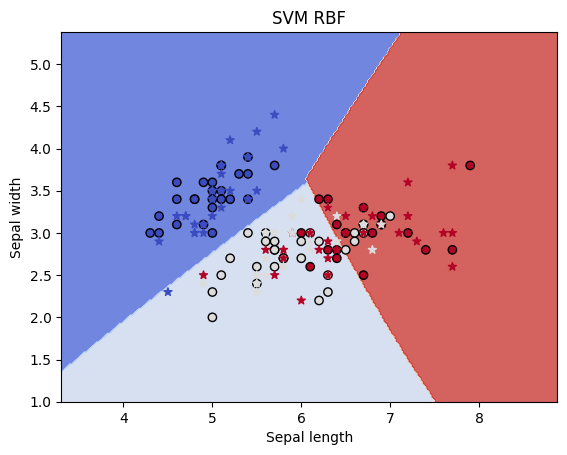

In [33]:
X, y = iris.data[:,:2], iris.target
# We keep 50% of the data set for the evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
# to be completed in Question 5
clf = svm.SVC(kernel='rbf', gamma=0.1, C=1.0)
clf.fit(X_train, y_train)
# To display the decision surface we will discretize the space with a #step h
h = .02
# Create the discretized decision surface
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Decision surface
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Also show learning points
plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k',c=y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("SVM RBF")

The accuracy of linear SVM: 0.7066666666666667
The accuracy of RBF Kernel SVM: 0.7466666666666667


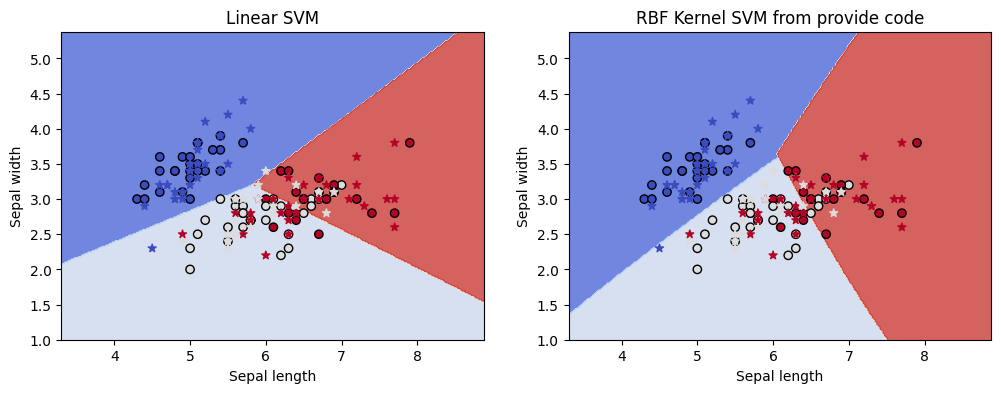

In [34]:
#answer
from sklearn.svm import LinearSVC

# Create and train the linear SVM model
linear_svc = LinearSVC(C=1.0)
linear_svc.fit(X_train, y_train)

# To display the decision surface we will discretize the space with a step h
h = .02
# Create the discretized decision surface
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Decision surface for linear SVM
Z_linear = linear_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z_linear = Z_linear.reshape(xx.shape)

# Calculate accuracies
accuracy_linear = linear_svc.score(X_test, y_test)
accuracy_rbf = clf.score(X_test, y_test)

# Plot the decision surface for linear SVM
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_linear, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("Linear SVM")
print("The accuracy of linear SVM:",accuracy_linear)

# Plot the decision surface for RBF kernel SVM
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("RBF Kernel SVM from provide code")
print("The accuracy of RBF Kernel SVM:",accuracy_rbf)

plt.show()
